# Machine Learning Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Datasets

In [2]:
dir_name = 'data_files/'

X_train = pd.read_csv(dir_name + 'preprocessed_X_train.csv')
y_train = pd.read_csv(dir_name + 'y_train.csv')
X_test = pd.read_csv(dir_name + 'preprocessed_X_test.csv')
y_test = pd.read_csv(dir_name + 'y_test.csv')

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()


model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 87075.9607304053
R-squared (R²): 0.22776452186966234


In [9]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Define parameter grid for Ridge and Lasso regression
param_grid = {
    'alpha': [0.1, 1, 10, 100, 1000]  # Regularization strength
}

# Initialize models
ridge = Ridge()
lasso = Lasso()

# Perform Grid Search for Ridge
ridge_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_search.fit(X_train, y_train)

# Perform Grid Search for Lasso
lasso_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_search.fit(X_train, y_train)

# Print the best parameters and the best score for Ridge
print("Best parameters for Ridge:", ridge_search.best_params_)
print("Best score for Ridge (negative MSE):", ridge_search.best_score_)

# Print the best parameters and the best score for Lasso
print("Best parameters for Lasso:", lasso_search.best_params_)
print("Best score for Lasso (negative MSE):", lasso_search.best_score_)

# Get the best model from Ridge and Lasso
best_ridge_model = ridge_search.best_estimator_
best_lasso_model = lasso_search.best_estimator_

# Evaluate the models on the test set
ridge_pred = best_ridge_model.predict(X_test)
lasso_pred = best_lasso_model.predict(X_test)

# Calculate and compare MSE for both models
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("Ridge MSE:", ridge_mse)
print("Lasso MSE:", lasso_mse)


Best parameters for Ridge: {'alpha': 0.1}
Best score for Ridge (negative MSE): -82250.03689987693
Best parameters for Lasso: {'alpha': 0.1}
Best score for Lasso (negative MSE): -82305.91434395546
Ridge MSE: 87133.58673283203
Lasso MSE: 87220.72865876801


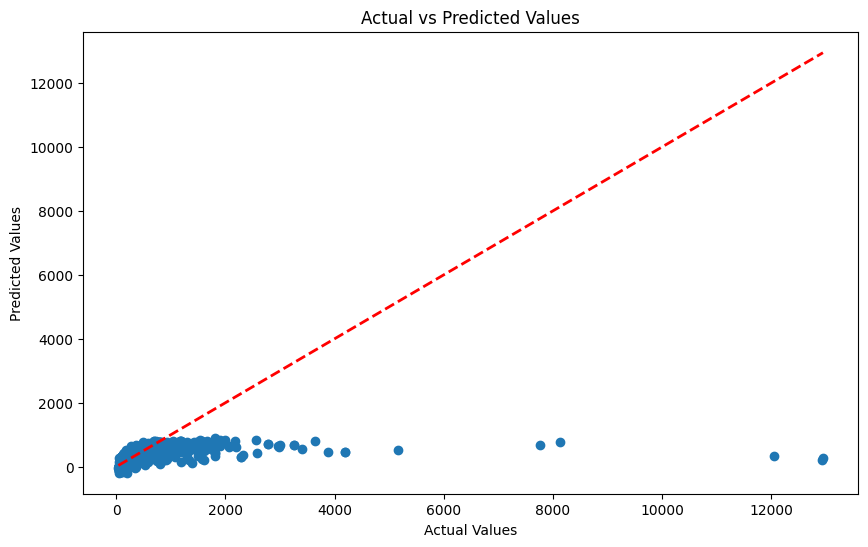

In [10]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


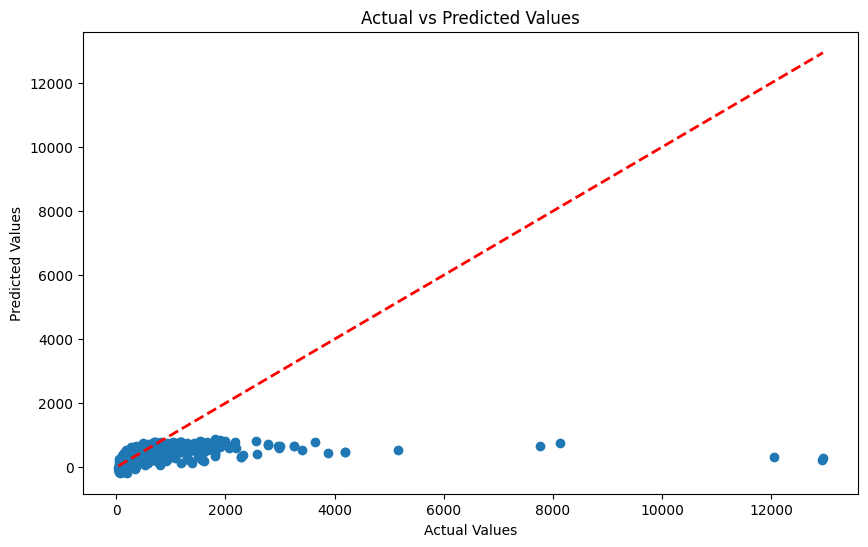

In [11]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [12]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.values.ravel())  # Flatten y_train to 1D array

# Predict using Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-squared (R²): {rf_r2}")

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train.values.ravel())  # Flatten y_train to 1D array

# Predict using Gradient Boosting
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regression Results:")
print(f"Mean Squared Error (MSE): {gb_mse}")
print(f"R-squared (R²): {gb_r2}")

Random Forest Regression Results:
Mean Squared Error (MSE): 37345.43275575072
R-squared (R²): 0.6688010344277335

Gradient Boosting Regression Results:
Mean Squared Error (MSE): 78051.52438910228
R-squared (R²): 0.3077979760449142


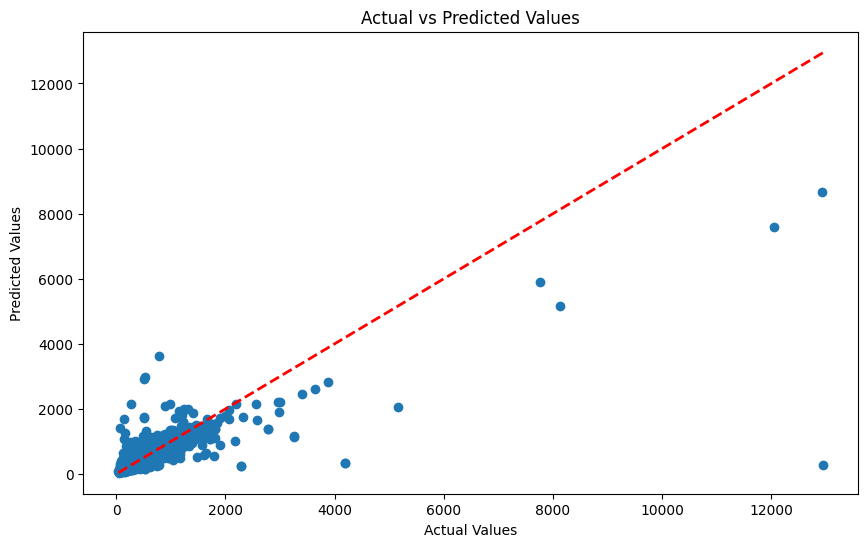

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

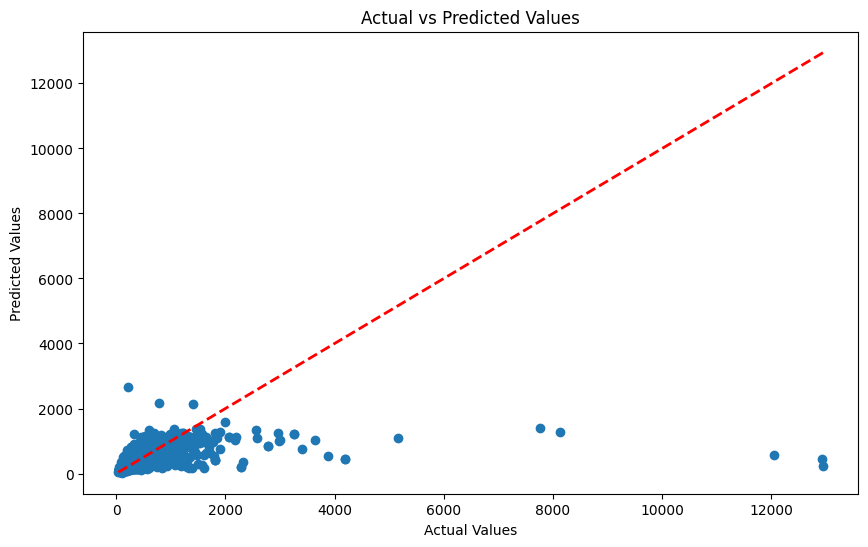

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Perform the search
grid_search.fit(X_train, y_train.values.ravel())  # Flatten y_train to 1D array

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best negative MSE score: {best_score}")

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_rf_best = best_rf_model.predict(X_test)

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

rf_mse_best = mean_squared_error(y_test, y_pred_rf_best)
rf_r2_best = r2_score(y_test, y_pred_rf_best)

print(f"Best Random Forest MSE: {rf_mse_best}")
print(f"Best Random Forest R²: {rf_r2_best}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits


c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
266 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\fizuf\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\fizuf\anaconda3\Lib\site-packag

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best negative MSE score: -62592.3539185698
Best Random Forest MSE: 37923.15424797342
Best Random Forest R²: 0.6636774959788837


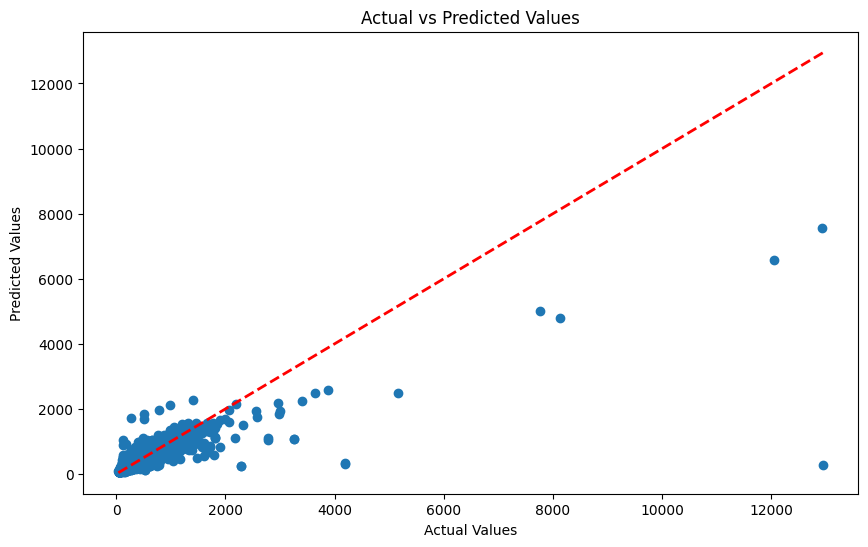

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_best)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()